In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | rikitea
Processing Record 2 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 13 | inhambane
Processing Record 4 of Set 13 | kodiak
Processing Record 5 of Set 13 | kavieng
Processing Record 6 of Set 13 | jamestown
Processing Record 7 of Set 13 | veranopolis
Processing Record 8 of Set 13 | saskylakh
Processing Record 9 of Set 13 | hermanus
Processing Record 10 of Set 13 | tuy hoa
Processing Record 11 of Set 13 | dikson
Processing Record 12 of Set 13 | ponta do sol
Processing Record 13 of Set 13 | collie
Processing Record 14 of Set 13 | khatanga
Processing Record 15 of Set 13 | vanavara
Processing Record 16 of Set 13 | comodoro rivadavia
Processing Record 17 of Set 13 | lovozero
Processing Record 18 of Set 13 | ribeira grande
Processing Record 19 of Set 13 | ushuaia
Processing Record 20 of Set 13 | vaini
Processing Record 21 of Set 13 | katete
Processing Record 22 of Set

Processing Record 32 of Set 16 | roma
Processing Record 33 of Set 16 | chuy
Processing Record 34 of Set 16 | nouna
Processing Record 35 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 16 | geresk
City not found. Skipping...
Processing Record 37 of Set 16 | marcona
City not found. Skipping...
Processing Record 38 of Set 16 | grootfontein
Processing Record 39 of Set 16 | general roca
Processing Record 40 of Set 16 | smidovich
Processing Record 41 of Set 16 | tigil
Processing Record 42 of Set 16 | grand-santi
Processing Record 43 of Set 16 | nome
Processing Record 44 of Set 16 | katsuura
Processing Record 45 of Set 16 | yialos
City not found. Skipping...
Processing Record 46 of Set 16 | buraydah
Processing Record 47 of Set 16 | diffa
Processing Record 48 of Set 16 | samusu
City not found. Skipping...
Processing Record 49 of Set 16 | luderitz
Processing Record 50 of Set 16 | torbay
Processing Record 1 of Set 17 | sobolevo
Processing Record 2 of Set 17 | san and

Processing Record 14 of Set 20 | lebu
Processing Record 15 of Set 20 | aksarka
Processing Record 16 of Set 20 | petropavlovsk-kamchatskiy
Processing Record 17 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 20 | nam tha
City not found. Skipping...
Processing Record 19 of Set 20 | manjacaze
Processing Record 20 of Set 20 | huejuquilla el alto
Processing Record 21 of Set 20 | vestmannaeyjar
Processing Record 22 of Set 20 | awjilah
Processing Record 23 of Set 20 | phan rang
City not found. Skipping...
Processing Record 24 of Set 20 | alofi
Processing Record 25 of Set 20 | gizo
Processing Record 26 of Set 20 | norrtalje
Processing Record 27 of Set 20 | fagersta
Processing Record 28 of Set 20 | baykit
Processing Record 29 of Set 20 | amapa
Processing Record 30 of Set 20 | russell
Processing Record 31 of Set 20 | huarmey
Processing Record 32 of Set 20 | chapais
Processing Record 33 of Set 20 | tarko-sale
Processing Record 34 of Set 20 | marsh harbour
Process

Processing Record 49 of Set 23 | begunitsy
Processing Record 50 of Set 23 | santiago del estero
Processing Record 1 of Set 24 | shimoda
Processing Record 2 of Set 24 | sterling
Processing Record 3 of Set 24 | havre-saint-pierre
Processing Record 4 of Set 24 | ayorou
Processing Record 5 of Set 24 | laguna
Processing Record 6 of Set 24 | aberdeen
Processing Record 7 of Set 24 | eureka
Processing Record 8 of Set 24 | qaqortoq
Processing Record 9 of Set 24 | anadyr
Processing Record 10 of Set 24 | nehe
Processing Record 11 of Set 24 | manzil salim
Processing Record 12 of Set 24 | basingstoke
Processing Record 13 of Set 24 | ternate
Processing Record 14 of Set 24 | guaruja
Processing Record 15 of Set 24 | kralendijk
Processing Record 16 of Set 24 | zolotinka
City not found. Skipping...
Processing Record 17 of Set 24 | kampot
Processing Record 18 of Set 24 | puerto madryn
Processing Record 19 of Set 24 | taoudenni
Processing Record 20 of Set 24 | hami
Processing Record 21 of Set 24 | corinto

In [10]:
len(city_data)

561

In [11]:
# Convert the array of dictionaires to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.10,73,64,19.42,PF,2021-12-10 02:07:54
1,Inhambane,-23.8650,35.3833,75.88,90,23,7.00,MZ,2021-12-10 02:07:55
2,Kodiak,57.7900,-152.4072,36.91,65,75,4.61,US,2021-12-10 02:07:55
3,Kavieng,-2.5744,150.7967,84.47,78,99,15.23,PG,2021-12-10 02:07:56
4,Jamestown,42.0970,-79.2353,35.71,71,90,8.01,US,2021-12-10 02:07:56
5,Veranopolis,-28.9361,-51.5494,58.89,98,0,2.13,BR,2021-12-10 02:07:56
6,Saskylakh,71.9167,114.0833,-12.78,99,100,5.64,RU,2021-12-10 02:07:57
7,Hermanus,-34.4187,19.2345,64.80,89,98,10.92,ZA,2021-12-10 02:07:57
8,Tuy Hoa,13.0833,109.3000,74.62,81,95,13.40,VN,2021-12-10 02:07:58
9,Dikson,73.5069,80.5464,-26.59,98,29,5.70,RU,2021-12-10 02:07:58


In [12]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-12-10 02:07:54,-23.1203,-134.9692,76.10,73,64,19.42
1,Inhambane,MZ,2021-12-10 02:07:55,-23.8650,35.3833,75.88,90,23,7.00
2,Kodiak,US,2021-12-10 02:07:55,57.7900,-152.4072,36.91,65,75,4.61
3,Kavieng,PG,2021-12-10 02:07:56,-2.5744,150.7967,84.47,78,99,15.23
4,Jamestown,US,2021-12-10 02:07:56,42.0970,-79.2353,35.71,71,90,8.01
5,Veranopolis,BR,2021-12-10 02:07:56,-28.9361,-51.5494,58.89,98,0,2.13
6,Saskylakh,RU,2021-12-10 02:07:57,71.9167,114.0833,-12.78,99,100,5.64
7,Hermanus,ZA,2021-12-10 02:07:57,-34.4187,19.2345,64.80,89,98,10.92
8,Tuy Hoa,VN,2021-12-10 02:07:58,13.0833,109.3000,74.62,81,95,13.40
9,Dikson,RU,2021-12-10 02:07:58,73.5069,80.5464,-26.59,98,29,5.70


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

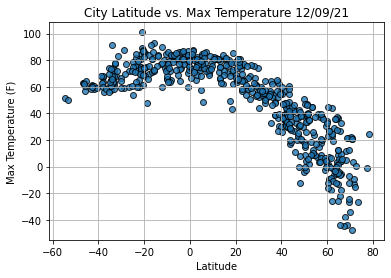

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

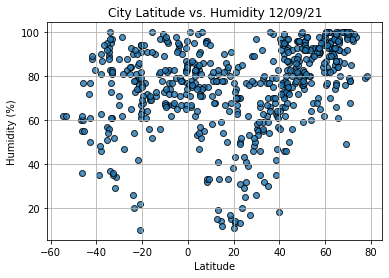

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

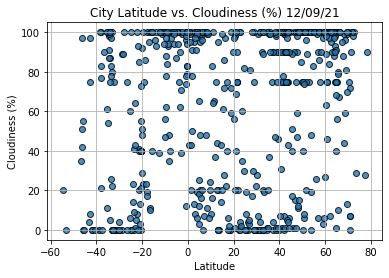

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

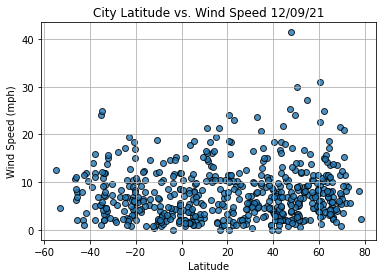

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Vanavara
Country                        RU
Date          2021-12-10 02:08:00
Lat                         60.34
Lng                      102.2797
Max Temp                     1.69
Humidity                       94
Cloudiness                    100
Wind Speed                   9.33
Name: 13, dtype: object

In [21]:
city_data_df["Lat"]>=0

0      False
1      False
2       True
3      False
4       True
       ...  
556     True
557     True
558     True
559     True
560     True
Name: Lat, Length: 561, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kodiak,US,2021-12-10 02:07:55,57.7900,-152.4072,36.91,65,75,4.61
4,Jamestown,US,2021-12-10 02:07:56,42.0970,-79.2353,35.71,71,90,8.01
6,Saskylakh,RU,2021-12-10 02:07:57,71.9167,114.0833,-12.78,99,100,5.64
8,Tuy Hoa,VN,2021-12-10 02:07:58,13.0833,109.3000,74.62,81,95,13.40
9,Dikson,RU,2021-12-10 02:07:58,73.5069,80.5464,-26.59,98,29,5.70
...,...,...,...,...,...,...,...,...,...
556,Atbasar,KZ,2021-12-10 02:11:10,51.8000,68.3333,5.97,81,20,6.69
557,Nouadhibou,MR,2021-12-10 02:08:32,20.9310,-17.0347,65.55,70,100,18.61
558,Orangeville,CA,2021-12-10 02:06:49,43.9168,-80.0997,29.19,97,100,13.13
559,Oppdal,NO,2021-12-10 02:11:11,62.5943,9.6912,19.17,89,100,14.94


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kodiak,US,2021-12-10 02:07:55,57.7900,-152.4072,36.91,65,75,4.61
4,Jamestown,US,2021-12-10 02:07:56,42.0970,-79.2353,35.71,71,90,8.01
6,Saskylakh,RU,2021-12-10 02:07:57,71.9167,114.0833,-12.78,99,100,5.64
8,Tuy Hoa,VN,2021-12-10 02:07:58,13.0833,109.3000,74.62,81,95,13.40
9,Dikson,RU,2021-12-10 02:07:58,73.5069,80.5464,-26.59,98,29,5.70


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

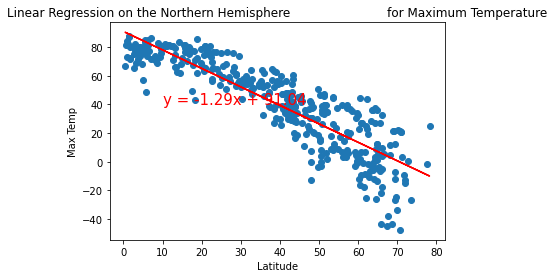

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

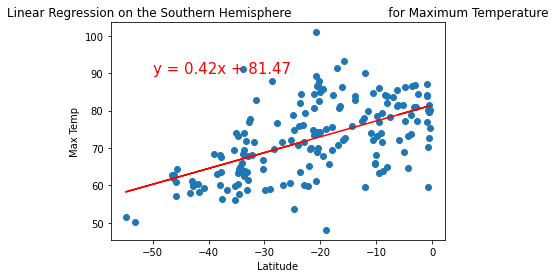

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

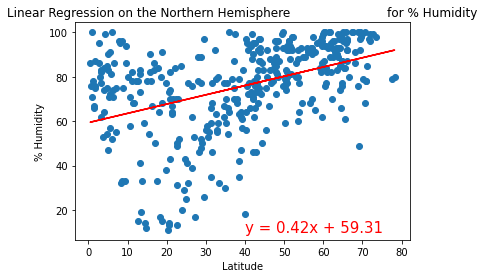

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

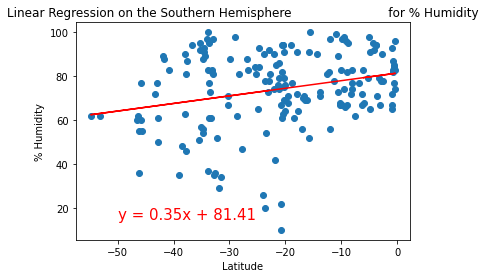

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

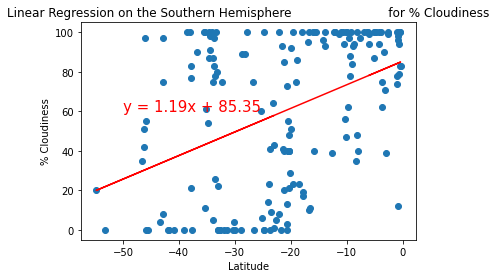

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

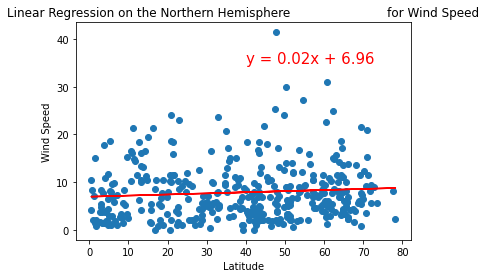

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

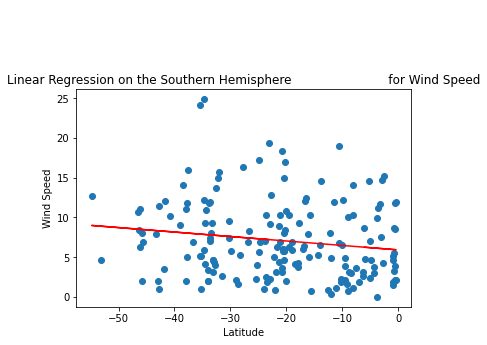

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))